In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Analyze Data

In [3]:
!ls -lrt ../../data/

ls: ../data/: No such file or directory


In [4]:
data = pd.read_csv('../../data/train.csv')

In [5]:
# columns in data
data.columns

Index(['id', 'brand', 'model', 'model_year', 'milage', 'fuel_type', 'engine',
       'transmission', 'ext_col', 'int_col', 'accident', 'clean_title',
       'price'],
      dtype='object')

In [6]:
# drop id column
data.drop('id', axis=1, inplace=True)

In [7]:
# get the types of columns
data.dtypes

brand           object
model           object
model_year       int64
milage           int64
fuel_type       object
engine          object
transmission    object
ext_col         object
int_col         object
accident        object
clean_title     object
price            int64
dtype: object

In [8]:
# check if it has any missing values
data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

In [9]:
# for the non-object columns, get the summary statistics
data.describe()

,model_year,milage,price
count,54273.000000,54273.000000,5.427300e+04
mean,2015.091979,72746.175667,3.921844e+04
std,5.588909,50469.490448,7.282634e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,32268.000000,1.550000e+04
50%,2016.000000,66107.000000,2.800000e+04
75%,2019.000000,102000.000000,4.500000e+04
max,2024.000000,405000.000000,2.954083e+06


In [10]:
# get the unique values in the object columns
data.select_dtypes(include=['object']).apply(pd.Series.nunique)

brand             53
model           1827
fuel_type          7
engine          1061
transmission      46
ext_col          260
int_col          124
accident           2
clean_title        1
dtype: int64

<Axes: xlabel='price', ylabel='Count'>

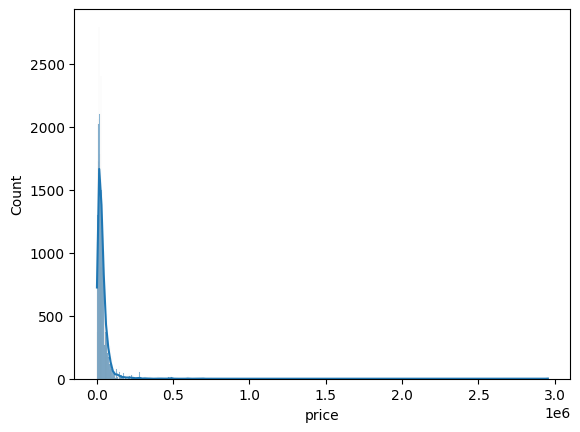

In [11]:
# show the distribution of the target variable
sns.histplot(data['price'], kde=True, label='price')

In [13]:
# get percentage of each category in the object columns
# print ( 0 < price < 0.5e6, 0.5e6 < price < 1e6, 1e6 < price < 1.5e6, 
# 1.5e6 < price < 2e6, 2.5e6 < price < 3e6

print(f'% in 0 < price < 0.5e6: {100 * data[data["price"] < 0.5e6].shape[0] / data.shape[0]:.2f}%')
print(f'% in 0.5e6 < price < 1e6: {100 * data[(data["price"] > 0.5e6) & (data["price"] < 1e6)].shape[0] / data.shape[0]:.2f}%')
print(f'% in 1e6 < price < 1.5e6: {100 * data[(data["price"] > 1e6) & (data["price"] < 1.5e6)].shape[0] / data.shape[0]:.2f}%')
print(f'% in 1.5e6 < price < 2e6: {100 * data[(data["price"] > 1.5e6) & (data["price"] < 2e6)].shape[0] / data.shape[0]:.2f}%')
print(f'% in 2e6 < price < 2.5e6: {100 * data[(data["price"] > 2e6) & (data["price"] < 2.5e6)].shape[0] / data.shape[0]:.2f}%')
print(f'% in 2.5e6 < price < 3e6: {100 * data[(data["price"] > 2.5e6) & (data["price"] < 3e6)].shape[0] / data.shape[0]:.2f}%')

% in 0 < price < 0.5e6: 99.84%
% in 0.5e6 < price < 1e6: 0.11%
% in 1e6 < price < 1.5e6: 0.00%
% in 1.5e6 < price < 2e6: 0.03%
% in 2e6 < price < 2.5e6: 0.00%
% in 2.5e6 < price < 3e6: 0.03%


In [14]:
# drop the rows where price is greater than 0.5e6
data = data[data['price'] < 0.5e6]
data.describe()

,model_year,milage,price
count,54184.000000,54184.000000,54184.000000
mean,2015.088605,72796.226377,37198.032076
std,5.587414,50442.052992,39557.835000
min,1974.000000,100.000000,2000.000000
25%,2012.000000,32437.000000,15500.000000
50%,2016.000000,66200.000000,28000.000000
75%,2019.000000,102000.000000,45000.000000
max,2024.000000,405000.000000,491836.000000


In [15]:
# drop price column and map remaining columns to dictionary
X_dicts = data.drop('price', axis=1).to_dict(orient='records')
y = data['price']

In [16]:
# split into train and test
from sklearn.model_selection import train_test_split
# divide the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_dicts, y, test_size=0.2, random_state=42)
# split test set into validation and test sets (10% validation, 10% test)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [17]:
X_train[0], y_train[0]

({'brand': 'Lexus',
  'model': 'RX 450h Base',
  'model_year': 2013,
  'milage': 148377,
  'fuel_type': 'Hybrid',
  'engine': '245.0HP 3.5L V6 Cylinder Engine Gas/Electric Hybrid',
  'transmission': 'A/T',
  'ext_col': 'Silver',
  'int_col': 'Black',
  'accident': 'At least 1 accident or damage reported',
  'clean_title': 'Yes'},
 11000)

# Vectorize Data

In [18]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer() # transform lists of mappings (dict-like objects) of feature names to feature values into Numpy arrays
X_train = dv.fit_transform(X_train)
X_test = dv.transform(X_test)
X_val = dv.transform(X_val)

print(X_train.shape, X_test.shape, X_val.shape)

(43347, 3331) (5418, 3331) (5419, 3331)


# Hyperparameter Search

In [19]:
import mlflow
import xgboost as xgb
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from hyperopt.pyll import scope
from sklearn.metrics import root_mean_squared_error

In [20]:
mlflow.set_tracking_uri("sqlite:///mlflow.db")
mlflow.set_experiment("hyperopt")

2024/05/31 15:30:20 INFO mlflow.store.db.utils: Creating initial MLflow database tables...
2024/05/31 15:30:20 INFO mlflow.store.db.utils: Updating database tables
INFO  [alembic.runtime.migration] Context impl SQLiteImpl.
INFO  [alembic.runtime.migration] Will assume non-transactional DDL.
INFO  [alembic.runtime.migration] Running upgrade  -> 451aebb31d03, add metric step
INFO  [alembic.runtime.migration] Running upgrade 451aebb31d03 -> 90e64c465722, migrate user column to tags
INFO  [alembic.runtime.migration] Running upgrade 90e64c465722 -> 181f10493468, allow nulls for metric values
INFO  [alembic.runtime.migration] Running upgrade 181f10493468 -> df50e92ffc5e, Add Experiment Tags Table
INFO  [alembic.runtime.migration] Running upgrade df50e92ffc5e -> 7ac759974ad8, Update run tags with larger limit
INFO  [alembic.runtime.migration] Running upgrade 7ac759974ad8 -> 89d4b8295536, create latest metrics table
INFO  [89d4b8295536_create_latest_metrics_table_py] Migration complete!
INFO  

<Experiment: artifact_location='/Users/gbemidebe/Documents/GitHub/KaggleXSkillAssessmentChallenge/notebooks/expanded_xgboost/mlruns/1', creation_time=1717187420228, experiment_id='1', last_update_time=1717187420228, lifecycle_stage='active', name='hyperopt', tags={}>

In [21]:
train = xgb.DMatrix(X_train, label=y_train)
valid = xgb.DMatrix(X_val, label=y_val)

def objective(params):
    with mlflow.start_run():
        mlflow.set_tag("model", "xgboost")
        mlflow.log_params(params)
        booster = xgb.train(
            params=params,
            dtrain=train,
            num_boost_round=1000,
            evals=[(valid, 'validation')],
            early_stopping_rounds=50, verbose_eval=False
        )
        y_pred = booster.predict(valid)
        rmse = root_mean_squared_error(y_val, y_pred)
        mlflow.log_metric("rmse", rmse)

    return {'loss': rmse, 'status': STATUS_OK}

In [22]:
search_space = {
    'max_depth': scope.int(hp.quniform('max_depth', 10, 500, 1)),
    'learning_rate': hp.loguniform('learning_rate', -3, 0),
    'reg_alpha': hp.loguniform('reg_alpha', -5, -1),
    'reg_lambda': hp.loguniform('reg_lambda', -6, -1),
    'min_child_weight': hp.loguniform('min_child_weight', -1, 3),
    'objective': 'reg:squarederror',
    'seed': hp.randint('seed', 100000),
}

best_result = fmin(
    fn=objective,
    space=search_space,
    algo=tpe.suggest,
    max_evals=100,
    trials=Trials(), 
)

100%|██████████| 100/100 [40:23<00:00, 24.24s/trial, best loss: 32118.923755966607] 


In [23]:
best_result

{'learning_rate': 0.049924799366491655,
 'max_depth': 12.0,
 'min_child_weight': 6.983161895125748,
 'reg_alpha': 0.09010269395580363,
 'reg_lambda': 0.0158680840153632,
 'seed': 13932}

## Train best Model

In [24]:
import pickle

mlflow.set_experiment("best_model_xgboost")

with mlflow.start_run():
    
    train = xgb.DMatrix(X_train, label=y_train)
    valid = xgb.DMatrix(X_val, label=y_val)

    mlflow.xgboost.autolog()

    # set the best hyperparameters
    best_result['max_depth'] = int(best_result['max_depth'])

    booster = xgb.train(
        params=best_result,
        dtrain=train,
        num_boost_round=1000,
        evals=[(valid, 'validation')],
        early_stopping_rounds=50, verbose_eval=False
    )

    rmse_train = root_mean_squared_error(y_train, booster.predict(train))
    rmse_val = root_mean_squared_error(y_val, booster.predict(valid))

    print(f"Train RMSE: {rmse_train:.2f}")
    print(f"Validation RMSE: {rmse_val:.2f}")


    with open("./preprocessor.b", "wb") as f_out:
        pickle.dump(dv, f_out)

2024/05/31 16:12:55 INFO mlflow.tracking.fluent: Experiment with name 'best_model_xgboost' does not exist. Creating a new experiment.
2024/05/31 16:12:58 WARNING mlflow.xgboost: Failed to infer model signature: could not sample data to infer model signature: please ensure that autologging is enabled before constructing the dataset.
2024/05/31 16:12:58 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/Users/gbemidebe/miniconda3/envs/exp-tracking-env/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [16:12:58] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified."


Train RMSE: 27783.48
Validation RMSE: 32118.92


## Test model

In [25]:
test_data_orig = pd.read_csv('../../data/test.csv')

In [26]:
test_data_orig.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [27]:
# ensure the columns are in the same order as the training data
test_data =  test_data_orig[data.columns[:-1]]
test_data.head()

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [28]:
# drop price column and map remaining columns to dictionary
X_test = test_data.to_dict(orient='records')
X_test[0]

{'brand': 'Mercedes-Benz',
 'model': 'E-Class E 350',
 'model_year': 2014,
 'milage': 73000,
 'fuel_type': 'Gasoline',
 'engine': '302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel',
 'transmission': 'A/T',
 'ext_col': 'White',
 'int_col': 'Beige',
 'accident': 'None reported',
 'clean_title': 'Yes'}

In [29]:
# load the preprocessor
with open("./preprocessor.b", "rb") as f_in:
    dv = pickle.load(f_in)

X_test = dv.transform(X_test)

In [30]:
# predict the price
y_pred_test = booster.predict(xgb.DMatrix(X_test))

In [31]:
# append the predictions as price to the test data and save the id and price columns
test_data_orig['price'] = y_pred_test

In [32]:
# save the test data with the predictions as a csv file. add date to the filename
test_data_orig[['id', 'price']].to_csv(f'../../data/expanded_xgboost_predictions_{pd.Timestamp.now()}.csv', index=False)